# Isolation Forest Anomaly detection

### Imports 


In [38]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
from sklearn.ensemble import IsolationForest


In [39]:
#load data
df = pd.read_csv('../Data/Xeek_Well_15-9-15.csv')
df.head()

,WELL,DEPTH_MD,GROUP,FORMATION,CALI,RDEP,RHOB,GR,NPHI,PEF,DTC,LITH
0,15/9-15,485.256,NORDLAND GP.,NaN,NaN,1.735962,NaN,78.275825,NaN,NaN,161.947510,Shale
1,15/9-15,485.408,NORDLAND GP.,NaN,NaN,1.744778,NaN,79.214615,NaN,NaN,161.267715,Shale
2,15/9-15,485.560,NORDLAND GP.,NaN,NaN,1.752990,NaN,79.724106,NaN,NaN,160.644363,Shale
3,15/9-15,485.712,NORDLAND GP.,NaN,NaN,1.760675,NaN,81.042778,NaN,NaN,160.212601,Shale
4,15/9-15,485.864,NORDLAND GP.,NaN,NaN,1.767360,NaN,80.785133,NaN,NaN,160.315948,Shale


In [40]:
#data analysis 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17717 entries, 0 to 17716
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   WELL       17717 non-null  object 
 1   DEPTH_MD   17717 non-null  float64
 2   GROUP      17717 non-null  object 
 3   FORMATION  15093 non-null  object 
 4   CALI       17635 non-null  float64
 5   RDEP       17717 non-null  float64
 6   RHOB       17521 non-null  float64
 7   GR         17717 non-null  float64
 8   NPHI       13346 non-null  float64
 9   PEF        17662 non-null  float64
 10  DTC        17708 non-null  float64
 11  LITH       17717 non-null  object 
dtypes: float64(8), object(4)
memory usage: 1.6+ MB


### Data analysis/cleaning 


In [41]:
df = df.dropna()

### Build the model:
First we'll just choose two features


In [42]:
anomaly_inputs = ['NPHI', 'RHOB']

### Model parameters : 
    
   contamination : how much of the overall data can be considered as an outlier 

   random_state :  control the random splitting of trees 


In [43]:
IFModel = IsolationForest(contamination=0.1, random_state=42) 

#fit the model 
IFModel.fit(df[anomaly_inputs])


c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.1, random_state=42)

### Compute anomaly scores 


In [44]:
#Compute anomaly scores (using decision function) 
df['anomaly_scores'] = IFModel.decision_function(df[anomaly_inputs])

#predict anomalies using model
df['anomaly'] = IFModel.predict(df[anomaly_inputs])


In [45]:

#get only the columns we need 
    #we ll get 1 for normal and -1 for anomalies 
df.loc[:, ['NPHI', 'RHOB', 'anomaly_scores', 'anomaly']]



,NPHI,RHOB,anomaly_scores,anomaly
4371,0.541850,2.063168,0.094522,1
4372,0.545401,2.051136,0.095207,1
4373,0.548953,2.041540,0.099837,1
4374,0.549356,2.035698,0.105620,1
4375,0.543351,2.029099,0.117897,1
...,...,...,...,...
17703,0.257656,2.391858,0.108037,1
17704,0.264047,2.408428,0.088239,1
17705,0.269605,2.432385,0.075509,1
17706,0.270624,2.452091,0.058709,1


### Use seaborn Vizualisation for better understanding :
Lets create a generic function for our plots 


In [46]:
#create a generic function
def anom_plot(data, anomaly_detection_method, x_var, y_var, 
              xaxis_limits=[0,1], yaxis_limits=[0,1]):
    print(f'Anomaly detection method: {anomaly_detection_method}')

    method = f'{anomaly_detection_method}_anomaly'

    print(f"Number of anomalous values {len(data[data['anomaly'] == -1])}")
    print(f"Number of non anomalous values {len(data[data['anomaly'] == 1])}")
    print(f"Total number of values {len(data)}")

    #create the plot 
    g = sns.FacetGrid(data, col='anomaly', height=4, hue='anomaly', hue_order=[1,-1])
    g.map(sns.scatterplot, x_var, y_var)
    g.fig.suptitle(f'Anomaly detection method : {anomaly_detection_method}', y=1.10, fontweight='bold')
    g.set(xlim=xaxis_limits, ylim= yaxis_limits)
    axes = g.axes.flatten()
    axes[0].set_title(f"Outliers\n{len(data[data['anomaly'] == -1])} points")
    axes[1].set_title(f"Inliers\n{len(data[data['anomaly'] == 1])} points")

    return g 

Anomaly detection method: Isolation forest
Number of anomalous values 1329
Number of non anomalous values 11961
Total number of values 13290


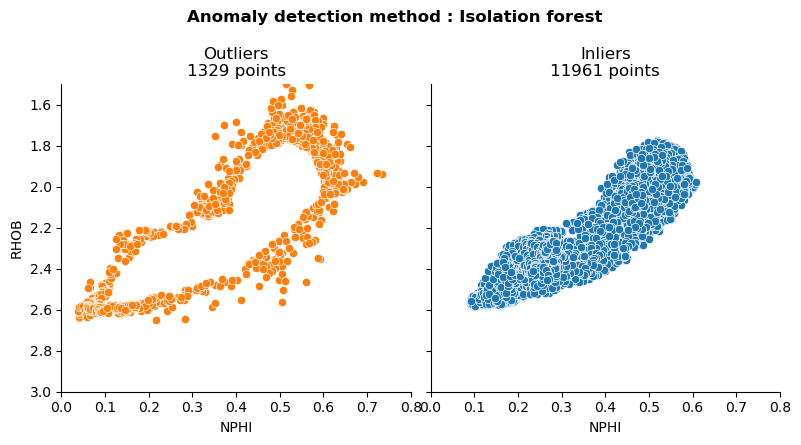

In [47]:
#test : 
anom_plot(df, "Isolation forest", "NPHI", "RHOB", [0, 0.8], [3, 1.5])
plt.show()

### Use multiple Features 

In [48]:
anomaly_inputs = ['NPHI', 'RHOB', 'GR', 'CALI', 'PEF', 'DTC']

In [49]:
IFModel = IsolationForest(contamination=0.1, random_state=42)
IFModel.fit(df[anomaly_inputs])

df['anomaly_scores'] = IFModel.decision_function(df[anomaly_inputs])
df['anomaly'] = IFModel.predict(df[anomaly_inputs])

c:\Users\user\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


### Plot pairPlot for multiple features (6 features):


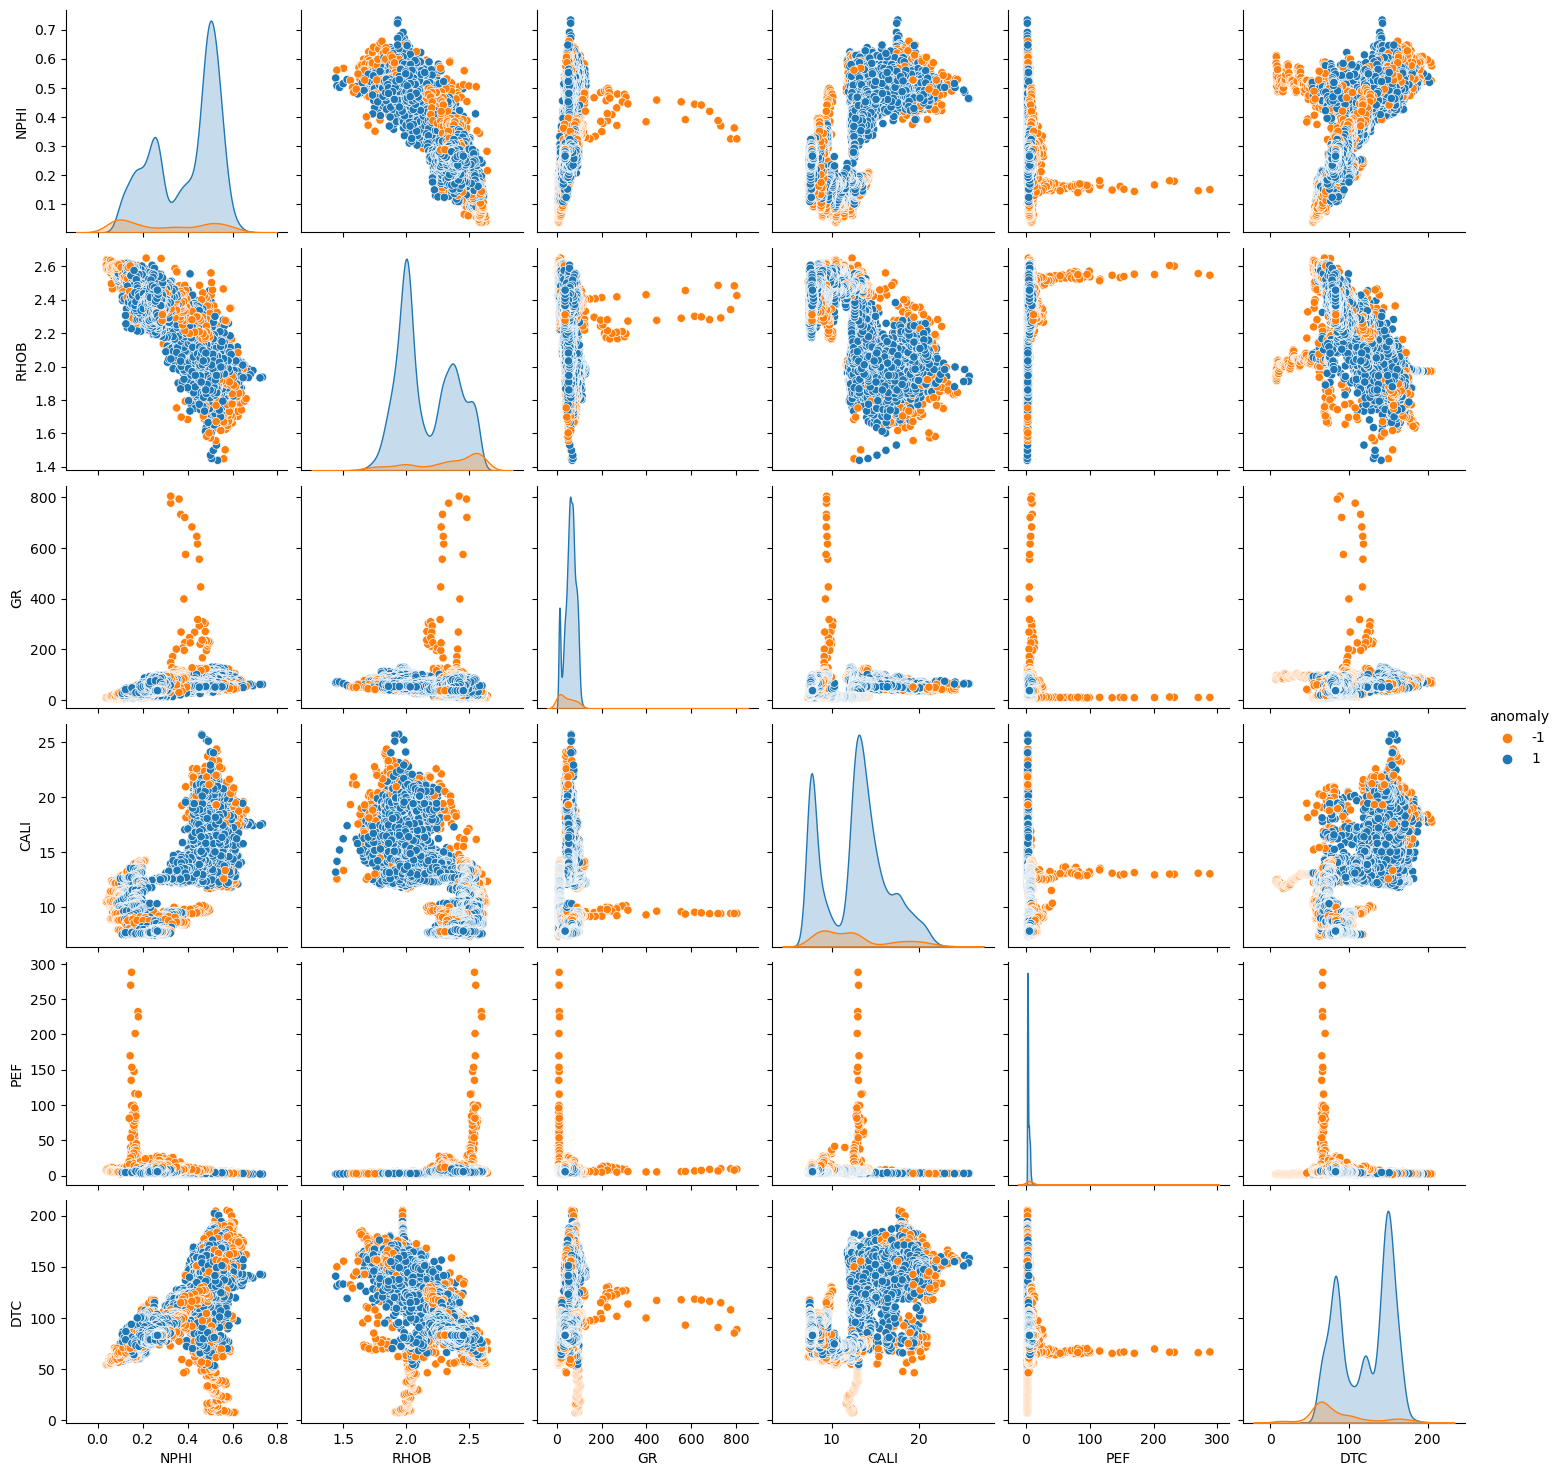

In [50]:
#test for multidimensional 
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(df, vars= anomaly_inputs, hue='anomaly', palette=palette)
plt.show()